## **Celebrity_Dataset_CNN_Face_Recognition_Asser**

**Face Recognition:** A facial recognition system is a technology capable of matching a human face from a digital image or a video frame against a database of faces, typically employed to authenticate users through ID verification services, works by pinpointing and measuring facial features from a given image.

 **Convolutional Neural Network (CNN):** convolutional neural networks are a class of deep neural networks used in deep learning and machine learning. Convolutional neural networks are usually used for visual imagery, helping the computer identify and learn from images.

 I have used the **'Celebrity Faces Dataset'** containing 2384 photo where 1732 photos of each of the 19 celebrities in the training directory and 652 photos of each
 celebrity in the validation/test directory

**Install or upgrade TensorFlow and Keras libraries to the latest versions**

In [ ]:
!pip install --upgrade tensorflow
!pip install --upgrade keras

**Mount Google Drive for file access**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**List contents of your Google Drive**

In [ ]:
!ls "/content/drive/MyDrive"

 Arch			       'Family Videos'
'Celebrity Faces Dataset.zip'  'Image Processing '
'Colab Notebooks'	       'SuperMarket (final file after modification ) Asser.rar'


**Use gdown to download the file from Google Drive and save it locally. The
file will be saved as 'Celebrity Faces Dataset.zip'**

In [ ]:
!pip install gdown
import gdown

# File ID from the link
file_id = '1YbZUTL-xYmehsu6njtr2qQyV5MItf7Bm'

# Construct the URL for gdown
url = f'https://drive.google.com/uc?export=download&id={file_id}'

# Download the file
gdown.download(url, 'Celebrity Faces Dataset.zip', quiet=False)

Downloading...
From (original): https://drive.google.com/uc?export=download&id=1YbZUTL-xYmehsu6njtr2qQyV5MItf7Bm
From (redirected): https://drive.google.com/uc?export=download&id=1YbZUTL-xYmehsu6njtr2qQyV5MItf7Bm&confirm=t&uuid=98c6778a-d428-4de1-8856-3cac0c3ec2af
To: /content/Celebrity Faces Dataset.zip
100%|██████████| 55.4M/55.4M [00:00<00:00, 84.8MB/s]


'Celebrity Faces Dataset.zip'

**Extract the downloaded ZIP file containing the dataset**

In [ ]:
import zipfile

# Path to the downloaded ZIP file
zip_file_path = 'Celebrity Faces Dataset.zip'
extract_folder = '/content/celebrity_faces_dataset/'

# Extract the ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

print(f"Dataset extracted to: {extract_folder}")

Dataset extracted to: /content/celebrity_faces_dataset/


**List the contents of the extracted folder**

In [ ]:
import os

# List the contents of the extracted folder
extracted_files = os.listdir(extract_folder)
print(extracted_files)

['Celebrity Faces Dataset']


**List the contents of the 'Celebrity Faces Dataset' directory**

In [ ]:
# List the contents of the 'Celebrity Faces Dataset' directory
celebrity_faces_folder = '/content/celebrity_faces_dataset/Celebrity Faces Dataset'
dataset_files = os.listdir(celebrity_faces_folder)
print(dataset_files)

['train', 'Sandra Bullock', 'Scarlett Johansson', 'Kate Winslet', 'Natalie Portman', 'Johnny Depp', 'Brad Pitt', 'Nicole Kidman', 'Robert Downey Jr', 'Will Smith', 'Tom Cruise', 'Hugh Jackman', 'Jennifer Lawrence', 'Angelina Jolie', 'validation', 'Denzel Washington', 'Tom Hanks', 'Leonardo DiCaprio', 'Megan Fox']


**Split the images into 80% for training and 20% for validation**

In [ ]:
import os
import shutil
import random

# Define paths to the dataset
dataset_dir = '/content/celebrity_faces_dataset/Celebrity Faces Dataset'
train_dir = os.path.join(dataset_dir, 'train')
validation_dir = os.path.join(dataset_dir, 'validation')

# Create the train and validation directories if they don't exist
os.makedirs(train_dir, exist_ok=True)
os.makedirs(validation_dir, exist_ok=True)

# Get the list of all celebrity directories
celebrity_dirs = [os.path.join(dataset_dir, celebrity) for celebrity in os.listdir(dataset_dir)
                  if os.path.isdir(os.path.join(dataset_dir, celebrity))]

# Loop through each celebrity folder to split the images
for celebrity_dir in celebrity_dirs:
    # Create subdirectories in train and validation directories for each celebrity
    os.makedirs(os.path.join(train_dir, os.path.basename(celebrity_dir)), exist_ok=True)
    os.makedirs(os.path.join(validation_dir, os.path.basename(celebrity_dir)), exist_ok=True)

    # Get all images in the celebrity folder
    images = [os.path.join(celebrity_dir, image) for image in os.listdir(celebrity_dir) if image.endswith('.jpg')]

    # Shuffle the images
    random.shuffle(images)

    # Split the images (80% for training and 20% for validation)
    split_index = int(0.8 * len(images))

    train_images = images[:split_index]
    validation_images = images[split_index:]

    # Move the images to the respective directories
    for train_image in train_images:
        shutil.move(train_image, os.path.join(train_dir, os.path.basename(celebrity_dir), os.path.basename(train_image)))

    for validation_image in validation_images:
        shutil.move(validation_image, os.path.join(validation_dir, os.path.basename(celebrity_dir), os.path.basename(validation_image)))

print("Data split into train and validation directories successfully.")

Data split into train and validation directories successfully.


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

**Importing necessary libraries and modules for image data augmentation and preprocessing**

In [ ]:
import os
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

**Checking the existence of the train and validation directories, and listing their contents**

In [ ]:
import os

# Check if the train and validation directories exist
train_dir = '/content/celebrity_faces_dataset/Celebrity Faces Dataset/train/'
validation_dir = '/content/celebrity_faces_dataset/Celebrity Faces Dataset/validation/'

print("Train directory exists:", os.path.exists(train_dir))
print("Validation directory exists:", os.path.exists(validation_dir))

# List the contents of the train and validation directories
print("Train directory contents:", os.listdir(train_dir) if os.path.exists(train_dir) else "Train directory not found")
print("Validation directory contents:", os.listdir(validation_dir) if os.path.exists(validation_dir) else "Validation directory not found")

Train directory exists: True
Validation directory exists: True
Train directory contents: ['train', 'Sandra Bullock', 'Scarlett Johansson', 'Kate Winslet', 'Natalie Portman', 'Johnny Depp', 'Brad Pitt', 'Nicole Kidman', 'Robert Downey Jr', 'Will Smith', 'Tom Cruise', 'Hugh Jackman', 'Jennifer Lawrence', 'Angelina Jolie', 'validation', 'Denzel Washington', 'Tom Hanks', 'Leonardo DiCaprio', 'Megan Fox']
Validation directory contents: ['train', 'Sandra Bullock', 'Scarlett Johansson', 'Kate Winslet', 'Natalie Portman', 'Johnny Depp', 'Brad Pitt', 'Nicole Kidman', 'Robert Downey Jr', 'Will Smith', 'Tom Cruise', 'Hugh Jackman', 'Jennifer Lawrence', 'Angelina Jolie', 'validation', 'Denzel Washington', 'Tom Hanks', 'Leonardo DiCaprio', 'Megan Fox']


**Splitting the celebrity dataset into training and validation sets, and organizing images into corresponding directories**

In [ ]:
import os
import shutil
import random

# Define the path to the extracted celebrity dataset
dataset_path = '/content/celebrity_faces_dataset/Celebrity Faces Dataset'

# Create the train and validation directories if they don't exist
train_dir = '/content/celebrity_faces_dataset/Celebrity Faces Dataset/train/'
validation_dir = '/content/celebrity_faces_dataset/Celebrity Faces Dataset/validation/'

os.makedirs(train_dir, exist_ok=True)
os.makedirs(validation_dir, exist_ok=True)

# Create subdirectories for each celebrity in train and validation folders
celebrity_folders = os.listdir(dataset_path)  # List of celebrity folders

# Split the data into training and validation sets
validation_split = 0.2  # 20% for validation

for celebrity in celebrity_folders:
    celebrity_path = os.path.join(dataset_path, celebrity)

    if os.path.isdir(celebrity_path):
        # Create subdirectories for each celebrity in the train and validation folders
        os.makedirs(os.path.join(train_dir, celebrity), exist_ok=True)
        os.makedirs(os.path.join(validation_dir, celebrity), exist_ok=True)

        # Get all the images of this celebrity
        images = [os.path.join(celebrity_path, img) for img in os.listdir(celebrity_path) if img.endswith('.jpg')]

        # Shuffle the images
        random.shuffle(images)

        # Split the images
        split_index = int(len(images) * (1 - validation_split))  # 80% train, 20% validation
        train_images = images[:split_index]
        validation_images = images[split_index:]

        # Move the images to the appropriate directories
        for image in train_images:
            shutil.move(image, os.path.join(train_dir, celebrity, os.path.basename(image)))

        for image in validation_images:
            shutil.move(image, os.path.join(validation_dir, celebrity, os.path.basename(image)))

print("Dataset has been split into train and validation directories.")

Dataset has been split into train and validation directories.


# **1. Dataset Loading and Preprocessing**

**Preparing the dataset for model training by setting up image data generators for train and validation sets**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the path for train and validation directories
train_dir = '/content/celebrity_faces_dataset/Celebrity Faces Dataset/train/'
validation_dir = '/content/celebrity_faces_dataset/Celebrity Faces Dataset/validation/'

# Set up ImageDataGenerator for rescaling the images (normalization)
train_datagen = ImageDataGenerator(rescale=1./255)  # Normalize the images to [0,1]
validation_datagen = ImageDataGenerator(rescale=1./255)

# Set up the data generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),  # Resize images to the required input size for the model
    batch_size=32,
    class_mode='categorical'  # Since we have multiple classes (celebrities)
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

Found 1791 images belonging to 19 classes.
Found 884 images belonging to 19 classes.


## **2. Model Definition**

**Building a Convolutional Neural Network (CNN) model for celebrity classification with 3 convolutional layers and a dense output layer**

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Initialize the model
model = Sequential()

# First Convolutional Layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second Convolutional Layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Third Convolutional Layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening Layer
model.add(Flatten())

# Fully Connected Layer
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

# Output Layer
model.add(Dense(19, activation='softmax'))  # 19 classes for the celebrities

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Summarize the model
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      18,940,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 19)                  │           9,747 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,043,411 (72.64 MB)

 Trainable params: 19,043,411 (72.64 MB)

 Non-trainable params: 0 (0.00 B)

# **3. Model Training**

**Training the CNN model using the training and validation data generators, with calculated steps per epoch and validation steps for full data utilization.**

In [ ]:
# Calculate steps per epoch and validation steps
steps_per_epoch = (train_generator.samples + train_generator.batch_size - 1) // train_generator.batch_size
validation_steps = (validation_generator.samples + validation_generator.batch_size - 1) // validation_generator.batch_size

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,  # Ensure all samples are included
    epochs=50,  # Adjust the number of epochs as needed
    validation_data=validation_generator,
    validation_steps=validation_steps  # Ensure all validation samples are included
)

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 137s 2s/step - accuracy: 0.0903 - loss: 3.0618 - val_accuracy: 0.2036 - val_loss: 2.5569
Epoch 2/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 126s 2s/step - accuracy: 0.1951 - loss: 2.5579 - val_accuracy: 0.3812 - val_loss: 2.1904
Epoch 3/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 152s 2s/step - accuracy: 0.3199 - loss: 2.1402 - val_accuracy: 0.6493 - val_loss: 1.4240
Epoch 4/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 135s 2s/step - accuracy: 0.5117 - loss: 1.5427 - val_accuracy: 0.8032 - val_loss: 0.8242
Epoch 5/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 143s 2s/step - accuracy: 0.6812 - loss: 0.9963 - val_accuracy: 0.9186 - val_loss: 0.4264
Epoch 6/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 139s 2s/step - accuracy: 0.8079 - loss: 0.6428 - val_accuracy: 0.9581 - val_loss: 0.1953
Epoch 7/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 125s 2s/step - accuracy: 0.8748 - loss: 0.3886 - val_accuracy: 0.9796 - val_loss: 0.1094
Epoch 8/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.9010 - loss: 0.3018 - val_accuracy: 0.9898 - v

**Saving the trained CNN model to a file named 'trained_cnn_model.h5' for later use and inference.**

In [ ]:
# Save the trained model
model.save('trained_cnn_model.h5')

# **Visualize the training and validation accuracy**

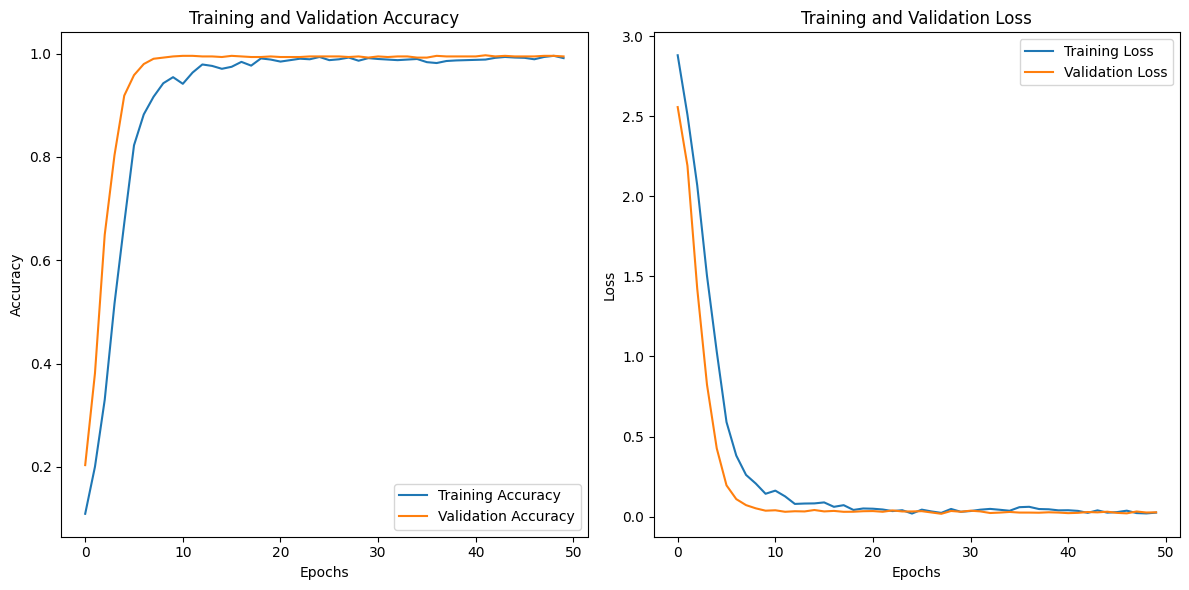

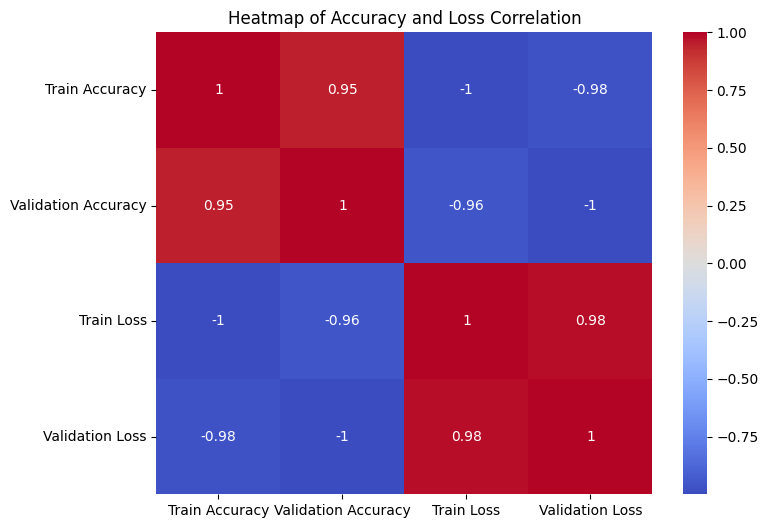

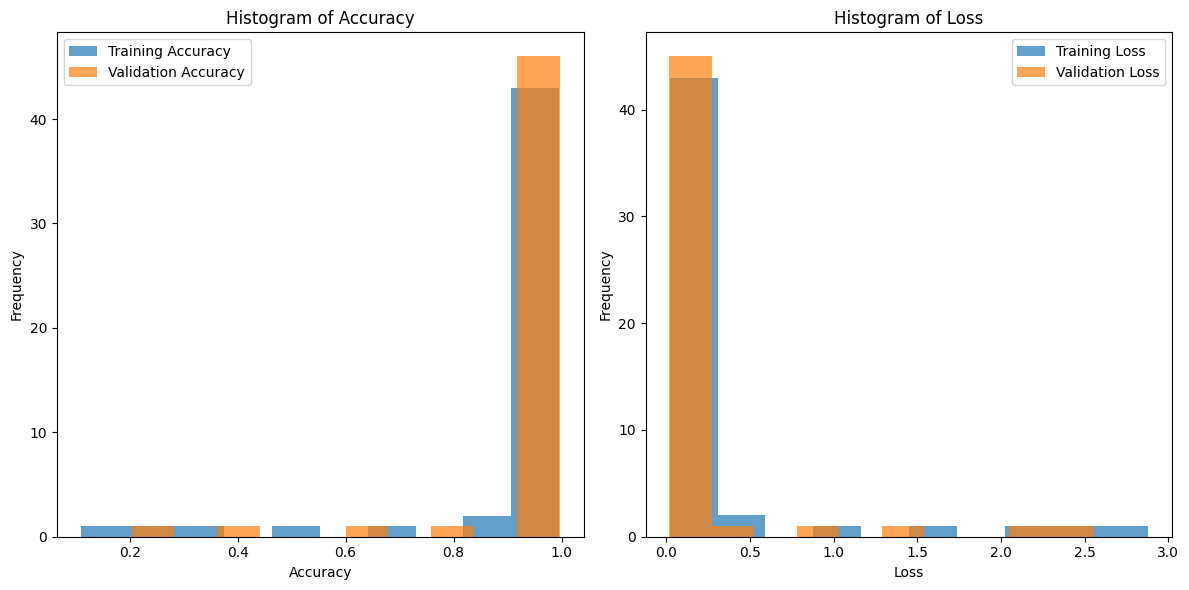

In [ ]:
plt.figure(figsize=(12, 6))

# Plot training accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()

# Heatmap for Accuracy and Loss Correlation
# Convert accuracy and loss history to numpy arrays for correlation
accuracy = np.array([history.history['accuracy'], history.history['val_accuracy']])
loss = np.array([history.history['loss'], history.history['val_loss']])

# Create a heatmap of the accuracy and loss correlation
plt.figure(figsize=(8, 6))
sns.heatmap(np.corrcoef(accuracy, loss), annot=True, cmap='coolwarm', xticklabels=['Train Accuracy', 'Validation Accuracy', 'Train Loss', 'Validation Loss'], yticklabels=['Train Accuracy', 'Validation Accuracy', 'Train Loss', 'Validation Loss'])
plt.title('Heatmap of Accuracy and Loss Correlation')
plt.show()

# Histogram for Accuracy and Loss distribution
plt.figure(figsize=(12, 6))

# Plot histogram for Training and Validation Accuracy
plt.subplot(1, 2, 1)
plt.hist(history.history['accuracy'], bins=10, alpha=0.7, label='Training Accuracy')
plt.hist(history.history['val_accuracy'], bins=10, alpha=0.7, label='Validation Accuracy')
plt.title('Histogram of Accuracy')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.legend()

# Plot histogram for Training and Validation Loss
plt.subplot(1, 2, 2)
plt.hist(history.history['loss'], bins=10, alpha=0.7, label='Training Loss')
plt.hist(history.history['val_loss'], bins=10, alpha=0.7, label='Validation Loss')
plt.title('Histogram of Loss')
plt.xlabel('Loss')
plt.ylabel('Frequency')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()

**Loading the previously trained CNN model from the saved file 'trained_cnn_model.h5' and displaying its structure for verification.**

In [ ]:
from tensorflow.keras.models import load_model

# Load the pre-trained model
model = load_model('trained_cnn_model.h5')

# Verify the model structure
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      18,940,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 19)                  │           9,747 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,043,413 (72.64 MB)

 Trainable params: 19,043,411 (72.64 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

# **4. Model Evaluation**

**Evaluating the model's performance on the validation dataset to calculate the loss and accuracy, providing an indication of the model's generalization ability.**

In [ ]:
# Evaluate the model on validation data
validation_loss, validation_accuracy = model.evaluate(validation_generator)
print(f"Validation Loss: {validation_loss}")
print(f"Validation Accuracy: {validation_accuracy}")

28/28 ━━━━━━━━━━━━━━━━━━━━ 24s 822ms/step - accuracy: 0.9972 - loss: 0.0123
Validation Loss: 0.02697714976966381
Validation Accuracy: 0.9943438768386841


**Visualizing model predictions with actual labels on a batch of validation images. This helps to compare the predicted celebrity names against the actual labels in a cleaner and more readable format.**

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 603ms/step


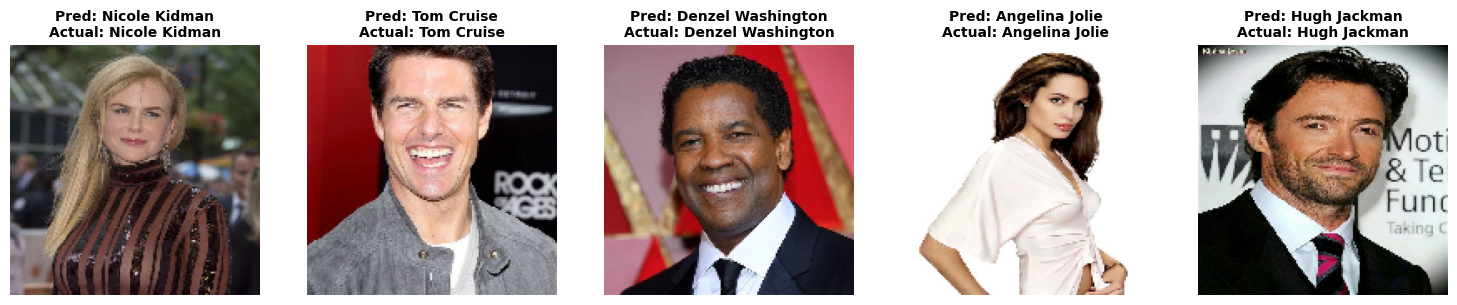

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Get a batch of images from the validation generator
validation_images, validation_labels = next(validation_generator)

# Predict on the batch
predictions = model.predict(validation_images)

# Get the mapping of class indices to celebrity names
class_indices = validation_generator.class_indices
class_names = {v: k for k, v in class_indices.items()}  # Reverse the dictionary to map from index to name

# Display predictions and actual labels with improved visualization
fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for i, ax in enumerate(axes):
    ax.imshow(validation_images[i])
    predicted_class_index = np.argmax(predictions[i])
    actual_class_index = np.argmax(validation_labels[i])

    # Get the celebrity name from the index
    predicted_name = class_names[predicted_class_index]
    actual_name = class_names[actual_class_index]

    # Set the title with a cleaner format
    ax.set_title(f'Pred: {predicted_name}\nActual: {actual_name}', fontsize=10, fontweight='bold')
    ax.axis('off')

# Display the plot
plt.tight_layout()  # This adjusts the spacing between subplots for better readability
plt.show()

**Thank You (:**